In [1]:
# Author: Ernesto Rodríguez
# github.com/ernestorodg

###############################################################################
## Analyse Bezerra's dataset for intrusion detection using Decision Trees
###############################################################################

In [2]:
import pandas as pd
import numpy as np
import sys

###############################################################################
## Define constants 
###############################################################################


# Random state for reproducibility
STATE = 0
np.random.seed(10)
# List of available attacks on the dataset


# Especific to the repository 
DATASET_DIRECTORY = r'../datasets/Dataset-bezerra-IoT-20200528T203526Z-001/Dataset-IoT/'
NETFLOW_DIRECTORY = r'NetFlow/'


# There are different csv files on the Dataset, with different types of data:

# Some meanings:
# MC: Media Center
# I: One hour of legitimate and malicious NetFlow data from profile.
# L: One hour of legitimate NetFlow data from profile.

MC = r'MC/'
ST = r'ST/'
SC = r'SC/'


# MC_I_FIRST: Has infected data by Hajime, Aidra and BashLite botnets 
MC_I_FIRST = r'MC_I1.csv'

# MC_I_SECOND: Has infected data from Mirai botnets
MC_I_SECOND = r'MC_I2.csv'

# MC_I_THIR: Has infected data from Mirai, Doflo, Tsunami and Wroba botnets
MC_I_THIRD = r'MC_I3.csv'

# MC_L: Has legitimate data, no infection
MC_L = r'MC_L.csv'


# Constants for ST
ST_I_FIRST = r'ST_I1.csv'
ST_I_SECOND = r'ST_I2.csv'
ST_I_THIRD = r'ST_I3.csv'
ST_L = r'ST_L.csv'

# Constants for SC
SC_I_FIRST = r'SC_I1.csv'
SC_I_SECOND = r'SC_I2.csv'
SC_I_THIRD = r'SC_I3.csv'
SC_L = r'SC_L.csv'


In [3]:
###############################################################################
## Load dataset
###############################################################################

# For MC data:
df_mc_I_first = pd.read_csv (DATASET_DIRECTORY + MC + NETFLOW_DIRECTORY + MC_I_FIRST)
df_mc_I_second = pd.read_csv (DATASET_DIRECTORY + MC + NETFLOW_DIRECTORY + MC_I_SECOND)
df_mc_I_third = pd.read_csv (DATASET_DIRECTORY + MC + NETFLOW_DIRECTORY + MC_I_THIRD)

# Add legitimate rows from MC_L
legitimate_frame_mc = pd.read_csv (DATASET_DIRECTORY + MC + NETFLOW_DIRECTORY + MC_L)

###################

# For ST data:
df_st_I_first = pd.read_csv (DATASET_DIRECTORY + ST + NETFLOW_DIRECTORY + ST_I_FIRST)
df_st_I_second = pd.read_csv (DATASET_DIRECTORY + ST + NETFLOW_DIRECTORY + ST_I_SECOND)
df_st_I_third = pd.read_csv (DATASET_DIRECTORY + ST + NETFLOW_DIRECTORY + ST_I_THIRD)

# Add legitimate rows from SC_L
legitimate_frame_st = pd.read_csv (DATASET_DIRECTORY + ST + NETFLOW_DIRECTORY + ST_L)


###################

# For SC data:
df_sc_I_first = pd.read_csv (DATASET_DIRECTORY + SC + NETFLOW_DIRECTORY + SC_I_FIRST)
df_sc_I_second = pd.read_csv (DATASET_DIRECTORY + SC + NETFLOW_DIRECTORY + SC_I_SECOND)
df_sc_I_third = pd.read_csv (DATASET_DIRECTORY + SC + NETFLOW_DIRECTORY + SC_I_THIRD)

# Add legitimate rows from MC_L
legitimate_frame_sc = pd.read_csv (DATASET_DIRECTORY + SC + NETFLOW_DIRECTORY + SC_L)

dataframes_list = [df_mc_I_first,
                df_mc_I_second,
                df_mc_I_third,
                legitimate_frame_mc,
                df_st_I_first,
                df_st_I_second,
                df_st_I_third,
                legitimate_frame_st,
                df_sc_I_first,
                df_sc_I_second,
                df_sc_I_third,
                legitimate_frame_sc]

# Joining the differents DataFrames
prev_df = pd.concat(dataframes_list)



In [4]:
prev_df

,Unnamed: 0,Label,ts,te,td,sa,da,sp,dp,pr,...,mpls8,mpls9,mpls10,cl,sl,al,ra,eng,exid,tr
0,0,0,2018-11-11 03:16:47,2018-11-11 03:16:47,16.00,192.168.1.100,192.168.1.109,53,55800.0,UDP,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1.0,1969-12-31 21:00:00.000
1,1,0,2018-11-11 03:16:47,2018-11-11 03:16:47,16.00,192.168.1.109,192.168.1.100,55800,53.0,UDP,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1.0,1969-12-31 21:00:00.000
2,2,0,2018-11-11 03:16:47,2018-11-11 03:20:48,240798.00,147.231.99.14,192.168.1.109,443,42582.0,TCP,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1.0,1969-12-31 21:00:00.000
3,3,0,2018-11-11 03:16:47,2018-11-11 03:20:48,240798.00,192.168.1.109,147.231.99.14,42582,443.0,TCP,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1.0,1969-12-31 21:00:00.000
4,4,0,2018-11-11 03:16:47,2018-11-11 03:16:47,0.11,192.168.1.100,192.168.1.109,53,47839.0,UDP,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1.0,1969-12-31 21:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,756,0,2018-11-07 03:20:47,2018-11-07 04:19:11,3503418.00,192.168.1.100,224.0.0.251,0,0.0,IGMP,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1.0,1969-12-31 21:00:00.000
757,757,0,2018-11-07 03:20:51,2018-11-07 04:19:11,3499963.00,192.168.1.102,224.0.0.251,0,0.0,IGMP,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1.0,1969-12-31 21:00:00.000
758,758,0,2018-11-07 03:20:45,2018-11-07 04:19:13,3507705.00,192.168.1.101,224.0.0.251,0,0.0,IGMP,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1.0,1969-12-31 21:00:00.000
759,759,0,2018-11-07 04:07:59,2018-11-07 04:19:36,696894.00,192.168.1.101,192.168.1.109,60194,8080.0,TCP,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1.0,1969-12-31 21:00:00.000


In [62]:
###############################################################################
## Modify the DataFrame
###############################################################################


# Sample the dataset if necessary
# df = prev_df.sample (frac = 0.1, replace = True, random_state = 0)
# Not taking a random sample:
df = prev_df.iloc[:100588, :]


# We can see that this dataset has a temporal description.
# So it is not a good idea to randomly remove rows if using RNN

# In this case we drop the index column, since pandas library creates an index
# automatically. 
df = df.drop(df.columns[0], axis=1)

# Also drop columns that has no significant data
df = df.drop(df.columns[14:], axis=1)

df = df.drop(['ts', 'te'], axis=1)

# Trying another drops to see relation between features and results
df = df.drop(['fwd', 'stos', 'sa', 'da'], axis=1)
# 'sp', 'dp', 'sa',  'da',  

# Counting number of null data
nanColumns = [i for i in df.columns if df [i].isnull ().any ()]

# Remove NaN and inf values
df.replace ('Infinity', np.nan, inplace = True) ## Or other text values
df.replace (np.inf, np.nan, inplace = True) ## Remove infinity
df.replace (np.nan, 0, inplace = True)


In [144]:
###############################################################################
## Slice the dataframe (usually the last column is the target)
###############################################################################

X = pd.DataFrame(df.iloc [:, 1:])

# Selecting other columns
# X = pd.concat([X, df.iloc[:, 2]], axis=1)

y = df.iloc [:, 0]
print('Number of non-attacks: ', y.value_counts()[0])
print('Number of attacks: ', y.value_counts()[1])

# See Output, only available on jupyter-notebooks
# X

Number of non-attacks:  588
Number of attacks:  100000


In [145]:
###############################################################################
## Create artificial non-attacks samples using Random Oversampling
###############################################################################

from imblearn.over_sampling import RandomOverSampler # doctest: +NORMALIZE_WHITESPACE

ros = RandomOverSampler(random_state=42)

X, y = ros.fit_resample(X, y)

print('Number of non-attacks: ', y.value_counts()[0])
print('Number of attacks: ', y.value_counts()[1])

Number of non-attacks:  100000
Number of attacks:  100000


In [146]:
# ###############################################################################
# ## Create artificial non-attacks samples using Random undersampling
# ###############################################################################

# from imblearn.under_sampling import RandomUnderSampler # doctest: +NORMALIZE_WHITESPACE

# ros = RandomUnderSampler(random_state=42)

# X, y = ros.fit_resample(X, y)

# print('Number of non-attacks: ', y.value_counts()[0])
# print('Number of attacks: ', y.value_counts()[1])

In [147]:
####################################################################
# Treating categorical data before splitting the dataset into the differents sets
####################################################################
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

cat_cols = X.columns[X.dtypes == 'O'] # Returns array with the columns that has Object types elements

# Check wether cat_cols is empty or not. If it is empty, do not do anything
if list(cat_cols):
    categories = [
        X[column].unique() for column in X[cat_cols]]

    for cat in categories:
        cat[cat == None] = 'missing'  # noqa

    # Replacing missing values
    categorical_imputer = SimpleImputer(missing_values=None, 
                                        strategy='constant', 
                                        fill_value='missing')

    X[cat_cols] = categorical_imputer.fit_transform(X[cat_cols])

    # Encoding the categorical data
    categorical_encoder = OrdinalEncoder(categories = categories)
    categorical_encoder.fit(X[cat_cols])
    X[cat_cols] = categorical_encoder.transform(X[cat_cols])

In [156]:
###############################################################################
## Split dataset into train and test sets if not using cross validation
###############################################################################
from sklearn.model_selection import train_test_split
TEST_SIZE = 1/5
VALIDATION_SIZE = 1/5


X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = TEST_SIZE,
                                                     random_state = STATE)


print ('\nSplitting dataset (validation/train):', 1/5)
X_train_val, X_val, y_train_val, y_val = train_test_split (
                                             X_train,
                                             y_train,
                                             test_size = VALIDATION_SIZE,
                                             random_state = STATE)


X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train_val = pd.DataFrame(X_train_val)
X_val = pd.DataFrame(X_val)



Splitting dataset (validation/train): 0.2


In [157]:
####################################################################
# Treat numerical data 
####################################################################
from sklearn.preprocessing import StandardScaler


num_cols = X_train.columns[(X_train.dtypes == 'float64') | (X_train.dtypes == 'int64')] # Returns array with the columns that has float types elements

# Scaling numerical values

numerical_scaler = StandardScaler()
numerical_scaler.fit(X_train)
X_train = numerical_scaler.transform(X_train)

X_test = numerical_scaler.transform(X_test)

# X_train

In [158]:
y_test.value_counts()

0    20107
1    19893
Name: Label, dtype: int64

In [159]:
from numpy import array
LENGTH = 5

sets_list = [X_train, X_test]
for index, data in enumerate(sets_list):
    n = data.shape[0]
    samples = []

    # step over the X_train.shape[0] (samples) in jumps of 200 (time_steps)
    for i in range(0,n,LENGTH):
        # grab from i to i + 200
        sample = data[i:i+LENGTH]
        samples.append(sample)

    # convert list of arrays into 2d array
    new_data = list()
    new_data = np.array(new_data)
    for i in range(len(samples)):
        new_data = np.append(new_data, samples[i])
        
    sets_list[index] = new_data.reshape(len(samples), LENGTH, data.shape[1])
     
    
X_train = sets_list[0]
X_test = sets_list[1]

In [160]:
X_train.shape

(32000, 5, 7)

In [161]:
answer_list = [y_train, y_test]
for index, answer in enumerate(answer_list):

    new_answer = list()
    new_answer = np.array(new_answer)
    answer = np.array(answer)
    for i in range (0, len(answer), LENGTH):
        new_answer = np.append(new_answer, answer[i])
    answer_list[index] = new_answer

In [162]:
## Preparing the test to see performance
y_train = answer_list[0]
y_test = answer_list[1]

In [163]:
pd.Series(y_train).value_counts()

1.0    16071
0.0    15929
dtype: int64

In [164]:
X_train[0]

array([[-0.23479317,  0.97831506, -0.58819965, -1.45313105, -1.13781338,
        -0.10000111, -0.07311963],
       [-0.23694535, -1.16873591,  1.21037682, -1.45313105, -1.13781338,
        -0.10000111, -0.07311609],
       [-0.23701669, -1.11533542, -0.58967789,  0.37076358,  1.01292705,
        -0.10000111, -0.0731292 ],
       [-0.23682645,  1.34131234, -0.58819965, -1.45313105, -1.13781338,
        -0.10000111, -0.07311857],
       [-0.23701669,  0.26600833, -0.58681995,  0.37076358,  1.01292705,
        -0.10000111, -0.0731292 ]])

In [165]:
# univariate lstm

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# define model
model = Sequential()
model.add(LSTM(50, activation= 'relu' , input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer= 'adam' , loss= 'mse' )

In [166]:
import time
# fit model

# Measure time of this training
start_time = time.time()

model.fit(X_train, y_train, epochs=50, verbose=0)

print("--- %s seconds ---" % (time.time() - start_time))

--- 118.69728326797485 seconds ---


In [167]:
y_pred = model.predict(X_test, verbose=0)
print(y_pred)

[[1.0043707 ]
 [0.99507767]
 [1.0162234 ]
 ...
 [0.01259566]
 [1.0045002 ]
 [0.00712124]]


In [168]:
pd.Series(y_train).value_counts()

1.0    16071
0.0    15929
dtype: int64

In [181]:
y_pred_rounded = np.round(y_pred, 0)

In [189]:
y_pred_rounded = pd.Series(y_pred_rounded.reshape(8000))

In [187]:
import tensorflow as tf
m = tf.keras.metrics.Precision()
m.update_state([0, 1, 1, 1], [1, 0, 1, 1])
m.result().numpy()



0.6666667

In [192]:
np.array(y_test)

array([1., 1., 1., ..., 0., 1., 0.])

In [197]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

Legitimate Transactions Detected (True Negatives):  3955
Legitimate Transactions Incorrectly Detected (False Positives):  52
Fraudulent Transactions Missed (False Negatives):  41
Fraudulent Transactions Detected (True Positives):  3952
Total Fraudulent Transactions:  3993


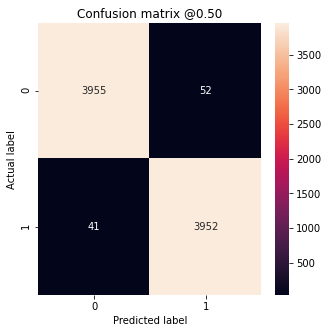

In [198]:
plot_cm(y_test, y_pred_rounded)